In [1]:
from sklearn.datasets import load_wine
samples, labels = load_wine(return_X_y=True)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

In [3]:
print(samples.shape)
X = samples.transpose()
m = np.array([[np.mean(x)] for x in X])
print("Mean:")
print(m)

(178, 13)
Mean:
[[1.30006180e+01]
 [2.33634831e+00]
 [2.36651685e+00]
 [1.94949438e+01]
 [9.97415730e+01]
 [2.29511236e+00]
 [2.02926966e+00]
 [3.61853933e-01]
 [1.59089888e+00]
 [5.05808988e+00]
 [9.57449438e-01]
 [2.61168539e+00]
 [7.46893258e+02]]


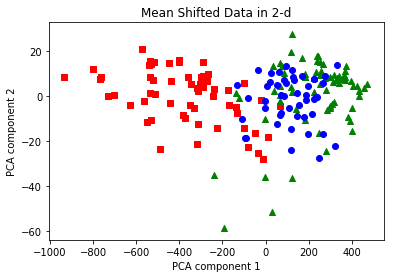

In [4]:
centered = X - m
U,sig,Vh = np.linalg.svd(centered, full_matrices=True)
centeredF = np.matmul(U[:,:2].transpose(), centered)

CF0 = []
CF1 = []
CF2 = []

for i in range(178):
    #print(train_l[i])
    if labels[i] == 0:
        CF0.append(centeredF[:,i])
    elif labels[i] == 1:
        CF1.append(centeredF[:,i])
    elif labels[i] == 2:
        CF2.append(centeredF[:,i])
        
CF0 = np.array(CF0).transpose()
CF1 = np.array(CF1).transpose()
CF2 = np.array(CF2).transpose()

fig = plt.figure()
f = fig.add_subplot(111)
f.set_title('Mean Shifted Data in 2-d')
f.set_xlabel('PCA component 1')
f.set_ylabel('PCA component 2')

f.scatter(CF0[0], CF0[1], color='r', marker='s')
f.scatter(CF1[0], CF1[1], color='g', marker='^')
f.scatter(CF2[0], CF2[1], color='b')

In [5]:
stdDev= np.array([[np.std(x)] for x in centered])
print("Standard Deviations:")
print(stdDev)

print(centered.shape)
normD = centered/stdDev
teststd= np.array([[np.std(x)] for x in normD])
print("Standard Deviations:")
print(teststd)

Standard Deviations:
[[8.09542915e-01]
 [1.11400363e+00]
 [2.73572294e-01]
 [3.33016976e+00]
 [1.42423077e+01]
 [6.24090564e-01]
 [9.96048950e-01]
 [1.24103260e-01]
 [5.70748849e-01]
 [2.31176466e+00]
 [2.27928607e-01]
 [7.07993265e-01]
 [3.14021657e+02]]
(13, 178)
Standard Deviations:
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


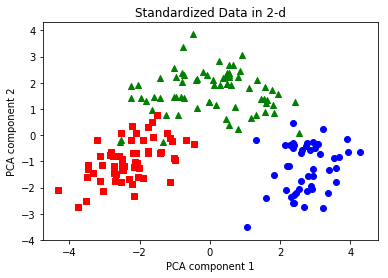

In [6]:
U,sig,Vh = np.linalg.svd(normD, full_matrices=True)
normF = np.matmul(U[:,:2].transpose(), normD)

NF0 = []
NF1 = []
NF2 = []

for i in range(178):
    if labels[i] == 0:
        NF0.append(normF[:,i])
    elif labels[i] == 1:
        NF1.append(normF[:,i])
    elif labels[i] == 2:
        NF2.append(normF[:,i])
        
NF0 = np.array(NF0).transpose()
NF1 = np.array(NF1).transpose()
NF2 = np.array(NF2).transpose()

fig = plt.figure()
f = fig.add_subplot(111)
f.set_title('Standardized Data in 2-d')
f.set_xlabel('PCA component 1')
f.set_ylabel('PCA component 2')

f.scatter(NF0[0], NF0[1], color='r', marker='s')
f.scatter(NF1[0], NF1[1], color='g', marker='^')
f.scatter(NF2[0], NF2[1], color='b')

#It seems like the PCA features corresponding to the unit variance and mean centered dataset would be better for classification.

In [7]:
def Gprob(mean, std, pt):
    return math.exp(-math.pow(pt - mean, 2)/(2*math.pow(std,2)))/(math.pow(2*math.pi, 0.5)*std)

#assuming 2d features and 3 classes
def trainGNB(DandLappended):
    U,_,_ = np.linalg.svd(DandLappended[:,:-1].transpose(), full_matrices=True)
    feat = np.matmul(U[:,:2].transpose(), DandLappended[:,:-1].transpose())
    DandLappended2 = np.concatenate((feat, DandLappended[:,-1][None,:]), axis=0)
    class0 = []
    class1 = []
    class2 = []
    for d in DandLappended2.transpose():
        #print(d)
        if d[-1]==0:
            class0.append(d[:-1])
        elif d[-1]==1:
            class1.append(d[:-1])
        elif d[-1]==2:
            class2.append(d[:-1])
    return np.array(class0), np.array(class1), np.array(class2)

def predictGNB(feat0, feat1, feat2, pts):
    U,_,_ = np.linalg.svd(pts,full_matrices=True)
    feats = np.matmul(U[:,:2].transpose(), pts).transpose()
    mean0x = np.mean(feat0[0,:])
    mean0y = np.mean(feat0[1,:])
    std0x = np.std(feat0[0,:])
    std0y = np.std(feat0[1,:])
    #print(mean0x, mean0y, std0x, std0y)
    
    mean1x = np.mean(feat1[0,:])
    mean1y = np.mean(feat1[1,:])
    std1x = np.std(feat1[0,:])
    std1y = np.std(feat1[1,:])
    #print(mean1x, mean1y, std1x, std1y)
    
    mean2x = np.mean(feat2[0,:])
    mean2y = np.mean(feat2[1,:])
    std2x = np.std(feat2[0,:])
    std2y = np.std(feat2[1,:])
    #print(mean2x, mean2y,std2x, std2y)
    
    predC = []
    
    for p in feats:
        p0 = Gprob(mean0x, std0x, p[0])*Gprob(mean0y,std0y,p[1])
        p1 = Gprob(mean1x, std1x, p[0])*Gprob(mean1y,std1y,p[1])
        p2 = Gprob(mean2x, std2x, p[0])*Gprob(mean2y,std2y,p[1])
        probs = [p0,p1,p2]
        predC.append(probs.index(max(probs)))
    return predC

In [8]:
from sklearn.naive_bayes import GaussianNB

In [9]:
aD = np.concatenate((X, labels[None,:]), axis=0)
print(aD.shape)

(14, 178)


In [10]:
ad = aD.transpose()

NF0 = []
NF1 = []
NF2 = []

for i in range(178):
    if labels[i] == 0:
        NF0.append(ad.transpose()[:,i])
    elif labels[i] == 1:
        NF1.append(ad.transpose()[:,i])
    elif labels[i] == 2:
        NF2.append(ad.transpose()[:,i])
        
NF0 = np.array(NF0)
NF1 = np.array(NF1)
NF2 = np.array(NF2)

perm0,perm1,perm2 = np.random.permutation(NF0.shape[0]), np.random.permutation(NF1.shape[0]), np.random.permutation(NF2.shape[0])
part01, part02, part03, part04, part05,_ = np.array(np.split(NF0[perm0],[12,24,36,48,60]))
part11, part12, part13, part14, part15,_ = np.array(np.split(NF1[perm1],[14,28,42,56,71]))
part21, part22, part23, part24, part25,_ = np.array(np.split(NF2[perm2],[9,18,28,38,48]))
#We wish to have around an average amount of each class in each of the folds.

as1 = np.concatenate((part01,part11,part21),axis=0)
as2 = np.concatenate((part02,part12,part22),axis=0)
as3 = np.concatenate((part03,part13,part23),axis=0)
as4 = np.concatenate((part04,part14,part24),axis=0)
as5 = np.concatenate((part05,part15,part25),axis=0)
print(as1.shape, as2.shape,as3.shape,as4.shape,as5.shape)


(35, 14) (35, 14) (36, 14) (36, 14) (36, 14)


In [11]:
#Case 1

listarrays = [as1,as2,as3,as4,as5]
errorMCC = []
for i in [0, 1, 2, 3, 4]:
    arr = listarrays[i]
    #print(arr[:,-1])
    del listarrays[i]
    training = np.array([[],[],[],[],[],[],[],[],[],[],[],[],[],[]]).transpose()
    for a in listarrays:
        training = np.concatenate((training,a),axis=0)
    tstart = training[:,:-1].transpose()
    tlabel = training[:,-1]
    tmean = np.array([[np.mean(x)] for x in tstart])
    tstart = tstart - tmean
    training = np.concatenate((tstart.transpose(), tlabel[:,None]), axis=1)
    a,b,c = trainGNB(training)
    a,b,c = a.transpose(),b.transpose(),c.transpose()
    teststart = arr[:,:-1].transpose()
    tmean = np.array([[np.mean(x)] for x in teststart])
    teststart = teststart - tmean
    g = predictGNB(a,b,c,teststart)
    print(arr[:,-1] - g)
    errorMCC.append(len(np.where(g - arr[:,-1] != 0)[0]))
    listarrays = [as1,as2,as3,as4,as5]
print('Errors:', errorMCC)
print('Mean:', np.mean(errorMCC))
print('Variation', math.pow(np.std(errorMCC),2))


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[ 0. -2.  0. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1.  0.  0.  0.
  0. -1.  0. -1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0. -1.  0.
  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -2.  0. -1. -1.  0.  0.  0.
  0.  0. -1.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  2.  2.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[ 0.  0.  0. -2.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0. -1.  0. -1.
  0. -1.  0.  0.  0. -1. -1.  0.  0.  0.  1.  1.  0.  0.

In [12]:
#Case 2

listarrays = [as1,as2,as3,as4,as5]
errorMCS = []
for i in [0, 1, 2, 3, 4]:
    arr = listarrays[i]
    #print(arr[:,-1])
    del listarrays[i]
    training = np.array([[],[],[],[],[],[],[],[],[],[],[],[],[],[]]).transpose()
    for a in listarrays:
        training = np.concatenate((training,a),axis=0)
    tstart = training[:,:-1].transpose()
    tlabel = training[:,-1]
    tmean = np.array([[np.mean(x)] for x in tstart])
    tstart = tstart - tmean
    stdDev= np.array([[np.std(x)] for x in tstart])
    tstart = tstart/stdDev
    training = np.concatenate((tstart.transpose(), tlabel[:,None]), axis=1)
    a,b,c = trainGNB(training)
    a,b,c = a.transpose(),b.transpose(),c.transpose()
    teststart = arr[:,:-1].transpose()
    tmean = np.array([[np.mean(x)] for x in teststart])
    teststart = teststart - tmean
    stdDev= np.array([[np.std(x)] for x in teststart])
    teststart = teststart/stdDev
    g = predictGNB(a,b,c,teststart)
    print(arr[:,-1] - g)
    errorMCS.append(len(np.where(g - arr[:,-1] != 0)[0]))
    listarrays = [as1,as2,as3,as4,as5]
print('Errors:', errorMCS)
print('Mean:', np.mean(errorMCS))
print('Variation', math.pow(np.std(errorMCS),2))


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[-1. -1.  0. -1. -1. -1. -1. -1.  0. -1. -1.  0.  1. -1. -1.  1. -1.  1.
  1.  1. -1.  1.  1.  1.  1. -1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[0. 0. 0. 0. 0. 0

In [13]:
#Case 3

GNB = GaussianNB()
listarrays = [as1,as2,as3,as4,as5]
errorMBI = []
for i in [0, 1, 2, 3, 4]:
    arr = listarrays[i]
    #print(arr[:,-1])
    del listarrays[i]
    training = np.array([[],[],[],[],[],[],[],[],[],[],[],[],[],[]]).transpose()
    for a in listarrays:
        training = np.concatenate((training,a),axis=0)
    tstart = training[:,:-1].transpose()
    tlabel = training[:,-1]
    tmean = np.array([[np.mean(x)] for x in tstart])
    tstart = tstart - tmean
    stdDev= np.array([[np.std(x)] for x in tstart])
    tstart = tstart/stdDev
    
    training = np.concatenate((tstart.transpose(), tlabel[:,None]), axis=1)
    GNB.fit(training[:,:-1], training[:,-1])
    teststart = arr[:,:-1].transpose()
    tmean = np.array([[np.mean(x)] for x in teststart])
    teststart = teststart - tmean
    stdDev= np.array([[np.std(x)] for x in teststart])
    teststart = teststart/stdDev
    g = GNB.predict(teststart.transpose())
    print(arr[:,-1] - g)
    errorMBI.append(len(np.where(g - arr[:,-1] != 0)[0]))
    listarrays = [as1,as2,as3,as4,as5]
print('Errors:', errorMBI)
print('Mean:', np.mean(errorMBI))
print('Variation', math.pow(np.std(errorMBI),2))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[ 0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.
  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[ 0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 

Overall, the accuracy for centered data was worse on average than the accuracy for the classifiers working with the centered and standardized data. We also see that the variation in the accuracy is also less reliable (that is, the variation is higher) for the classifier working with centered data when compared to the classifiers working with standardized data. Then we suppose that in general Case 1 is worse than either of Cases 2 or 3. Finally, we see that the built-in function to sklearn has slightly better mean and variance than the implementation made. We can assume that there are some additional nontrivial optimizations happening behind the scenes. In the samples attempted, we have Case 3 is better than Case 2 marginally. This is especially true since there are ocassions when there is extremely high variance in the implementation but not the built-in function. We reason that it must be because of an unlucky split for the k-fold validation, which we try to keep an average amount of each class in each fold. However, variation within each class causes this error and clearly the built-in function deals with it much better. In the case when there is a bad fold in the implementation, refreshing a new seed for a newly randomized folds will often fix the problem if one is not overly unlucky.